In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("file_02.csv")
df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [22]:
df.shape

(4945, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


### there are 1978 null values in nuclear columns,we can replace it with mean.

In [6]:
mn1=df["Nuclear Generation Actual (in MU)"].mean()
df["Nuclear Generation Actual (in MU)"].fillna(mn1,inplace=True)

mn2=df["Nuclear Generation Estimated (in MU)"].mean()
df["Nuclear Generation Estimated (in MU)"].fillna(mn2,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     4945 non-null   float64
 6   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


### index column is not useful in analysis we can drop it.

In [8]:
df.drop("index",axis=1,inplace=True)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4945 non-null   object 
 1   Region                                4945 non-null   object 
 2   Thermal Generation Actual (in MU)     4945 non-null   object 
 3   Thermal Generation Estimated (in MU)  4945 non-null   object 
 4   Nuclear Generation Actual (in MU)     4945 non-null   float64
 5   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 6   Hydro Generation Actual (in MU)       4945 non-null   float64
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), object(4)
memory usage: 309.2+ KB


### two columns with float values have different datatype

In [10]:
def changeflt(x):
    if "," in x:
        x=x.replace(",","")
        return float(x) 
    else:
        return float(x) 
    
df["Thermal Generation Estimated (in MU)"]=df["Thermal Generation Estimated (in MU)"].map(changeflt)


In [11]:
df["Thermal Generation Actual (in MU)"]=df["Thermal Generation Actual (in MU)"].map(changeflt)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4945 non-null   object 
 1   Region                                4945 non-null   object 
 2   Thermal Generation Actual (in MU)     4945 non-null   float64
 3   Thermal Generation Estimated (in MU)  4945 non-null   float64
 4   Nuclear Generation Actual (in MU)     4945 non-null   float64
 5   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 6   Hydro Generation Actual (in MU)       4945 non-null   float64
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(6), object(2)
memory usage: 309.2+ KB


### maximum power generated by which power plant ?

In [13]:
avg1=df["Thermal Generation Actual (in MU)"].mean()
print("average power generated through thermal power plants",avg1)

avg2=df["Nuclear Generation Actual (in MU)"].mean()
print("average power generated through Nuclear power plants",avg2)

avg3=df["Hydro Generation Actual (in MU)"].mean()
print("average power generated through Hydro power plants",avg3)


average power generated through thermal power plants 603.9783579373077
average power generated through Nuclear power plants 37.242207617121224
average power generated through Hydro power plants 73.30592113245689


In [14]:
per=avg1/(avg1+avg2+avg3)*100
print("power generation throuth thermal power plants in percentage",per)


power generation throuth thermal power plants in percentage 84.52847713705235


##### from mean of the all resources we can conclude that most of the power in india generated through thermal power plants.

###  in which region maximum  power generated through thermal power plant?

In [15]:
df[df["Thermal Generation Actual (in MU)"]==df["Thermal Generation Actual (in MU)"].max()]["Region"]

3051    Western
3056    Western
3061    Western
3066    Western
3071    Western
3076    Western
3081    Western
3086    Western
3091    Western
3096    Western
3101    Western
Name: Region, dtype: object

##### maximum power gwnerated throuth western region, most of the thermal power plants are located in western region.

###  in which region maximum  power generated through nuclear power plant?

In [16]:
df[df["Nuclear Generation Actual (in MU)"]==df["Nuclear Generation Actual (in MU)"].max()]["Region"]

1977    Southern
1982    Southern
1987    Southern
1992    Southern
1997    Southern
2002    Southern
2007    Southern
2012    Southern
2017    Southern
2022    Southern
2027    Southern
2032    Southern
2037    Southern
2042    Southern
2047    Southern
2052    Southern
2057    Southern
2062    Southern
2067    Southern
2072    Southern
2077    Southern
2082    Southern
2087    Southern
2092    Southern
2097    Southern
2102    Southern
2107    Southern
2112    Southern
2117    Southern
Name: Region, dtype: object

#### most of the nuclear power gwnerated throuth southern region, most of the nuclear power plants are located in southern region.

###  in which region maximum  power generated through hydro power plant?

In [17]:

df[df["Hydro Generation Actual (in MU)"]==df["Hydro Generation Actual (in MU)"].max()]["Region"]
#maximum power generated through hydro power plant is from nothern region.

4940    Northern
Name: Region, dtype: object

### difference in expected and actual power generation through all power plants

In [18]:
#difference in estimated and actual power generation through thermal power plants.
ans1=(df["Thermal Generation Estimated (in MU)"].mean())-(df["Thermal Generation Actual (in MU)"].mean())
ans1

-28.583241658234215

In [19]:
#difference in estimated and actual power generation through nuclear power plants.
ans2=(df["Nuclear Generation Estimated (in MU)"].mean())-(df["Nuclear Generation Actual (in MU)"].mean())
ans2

-0.2543309740467734

In [20]:
#difference in estimated and actual power generation through hydro power plants.
ans3=(df["Hydro Generation Estimated (in MU)"].mean())-(df["Hydro Generation Actual (in MU)"].mean())
ans3

3.5370434782610403

### graphical representation of power generation 

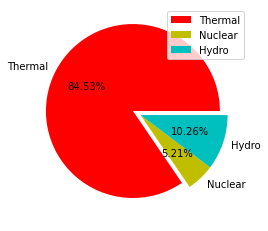

In [21]:
d=[avg1,avg2,avg3]
types=["Thermal","Nuclear","Hydro"]
cols=["r","y","c"]
plt.pie(d, labels=types, colors=cols, explode=(0.1,0,0),autopct="%1.2f%%")
plt.legend()
plt.show()